File opened successfully
CRS: PROJCS["Sphere_ARC_INFO_Lambert_Azimuthal_Equal_Area",GEOGCS["GCS_Sphere_ARC_INFO",DATUM["D_Sphere_ARC_INFO",SPHEROID["Sphere_ARC_INFO",6370997,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Lambert_Azimuthal_Equal_Area"],PARAMETER["latitude_of_center",45],PARAMETER["longitude_of_center",-100],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
Resolution: (1000.0, 1000.0)
Width x Height (pixels): 4587 x 2889
Bounds: BoundingBox(left=-2051000.0, bottom=-2136000.0, right=2536000.0, top=753000.0)
Number of Bands: 1


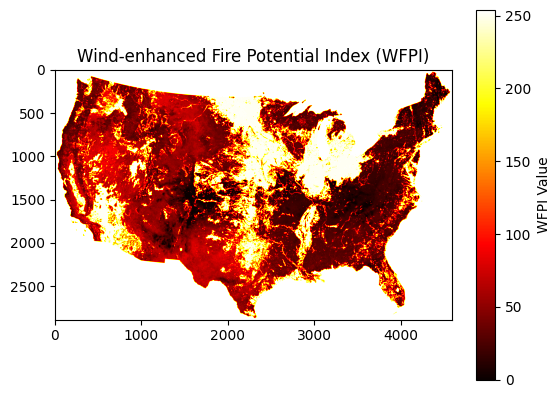

In [ ]:
import rasterio
import matplotlib.pyplot as plt
from rasterio.warp import calculate_default_transform, reproject, Resampling

# Open the risk map
with rasterio.open("wfpi_data_20230826_20230826.tiff") as src:
   
    wfpi_data = src.read(1)  # read the first band
    wfpi_meta = src.meta
    print("File opened successfully")
    print("CRS:", src.crs)
    print("Resolution:", src.res)
    print("Width x Height (pixels):", src.width, "x", src.height)
    print("Bounds:", src.bounds)
    print("Number of Bands:", src.count)

    dst_crs = 'EPSG:5070'  
    transform, width, height = calculate_default_transform(
        src.crs, dst_crs, src.width, src.height, *src.bounds)

    kwargs = src.meta.copy()
    kwargs.update({
        'crs': dst_crs,
        'transform': transform,
        'width': width,
        'height': height
    })

    # Reproject the risk map
    with rasterio.open('reprojected_wfpi_data_20230826_20230826.tif', 'w', **kwargs) as dst:
        for i in range(1, src.count + 1):
            reproject(
                source=rasterio.band(src, i),
                destination=rasterio.band(dst, i),
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=transform,
                dst_crs=dst_crs,
                resampling=Resampling.nearest)

# Visualize
plt.imshow(wfpi_data, cmap='hot', vmin=0, vmax=254)
plt.colorbar(label="WFPI Value")
plt.title("Wind-enhanced Fire Potential Index (WFPI)")
plt.show()


In [35]:
# Print metadata
print("File opened successfully")
print("CRS:", dst.crs)
print("Resolution:", dst.res)
print("Width x Height (pixels):", dst.width, "x", dst.height)
print("Bounds:", dst.bounds)
print("Number of Bands:", dst.count)

File opened successfully
CRS: EPSG:5070
Resolution: (1008.4179554777692, 1008.4179554777692)
Width x Height (pixels): 4731 x 3033
Bounds: BoundingBox(left=-2462737.059583813, bottom=177783.92180015333, right=2308088.2877815133, top=3236315.580764227)
Number of Bands: 1


In [36]:
import rasterio

# Replace with your actual file path
file_path = '../../wildfire-risk/sim2real_layout/0041_Elevation.tif'  # or 'your_file.tiff'

# Open the file
with rasterio.open(file_path) as src:
    bbox = src.bounds
    print("File opened successfully")
    print("CRS:", src.crs)
    print("Resolution:", src.res)
    print("Width x Height (pixels):", src.width, "x", src.height)
    print("Bounds:", src.bounds)
    print("Number of Bands:", src.count)


File opened successfully
CRS: EPSG:5070
Resolution: (30.0, 30.0)
Width x Height (pixels): 607 x 551
Bounds: BoundingBox(left=293985.0, bottom=877845.0, right=312195.0, top=894375.0)
Number of Bands: 1


Projections match, ie EPSG:5070.

In [18]:
from rasterio.mask import mask
from rasterio.windows import from_bounds

# Crop the Risk Map according to our Layout

In [37]:
with rasterio.open("reprojected_wfpi_data_20230826_20230826.tif") as reproj_src:
    if reproj_src.crs != src.crs:
        raise ValueError("CRS mismatch — reproject bbox file too if needed.")

    # Step 1: Get the bounding box of the raster bbox and create a window
    window = from_bounds(*bbox, transform=reproj_src.transform)
    cropped_data = reproj_src.read(window=window)
    cropped_transform = reproj_src.window_transform(window)

    cropped_meta = reproj_src.meta.copy()
    cropped_meta.update({
        "height": cropped_data.shape[1],
        "width": cropped_data.shape[2],
        "transform": cropped_transform
    })

# Step 2: Save the cropped output
with rasterio.open("cropped_reprojected_wfpi.tif", "w", **cropped_meta) as out:
    out.write(cropped_data)

Resolution: (1008.4179554777692, 1008.4179554777692)
Width x Height (pixels): 18 x 16


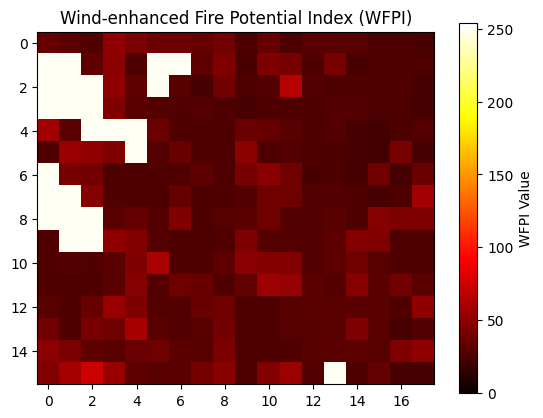

In [38]:
# Visualize
with rasterio.open("cropped_reprojected_wfpi.tif") as src:
   
    wfpi_data = src.read(1)  # read the first band
    wfpi_meta = src.meta
    print("Resolution:", src.res)
    print("Width x Height (pixels):", src.width, "x", src.height)

plt.imshow(wfpi_data, cmap='hot', vmin=0, vmax=254)
plt.colorbar(label="WFPI Value")
plt.title("Wind-enhanced Fire Potential Index (WFPI)")
plt.show()